In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import scipy.optimize as op

In [2]:
Temps_uncalibrated = pd.read_hdf('calibration/Days14_15_93dBm.hdf5')
Kjnc = pd.read_hdf('calibration/Kjnc_Days14_15_93dBm.hdf5')
Temps =Kjnc*Temps_uncalibrated

In [3]:
Temps = Temps[Temps>0.] # Filter negative temperatures
log_Temps = np.log10(Temps) 
log_mask = (log_Temps>2.)&(log_Temps<5.)
log_Temps = log_Temps[log_mask]# Filter high and low temperatures 
Temps = Temps[log_mask]

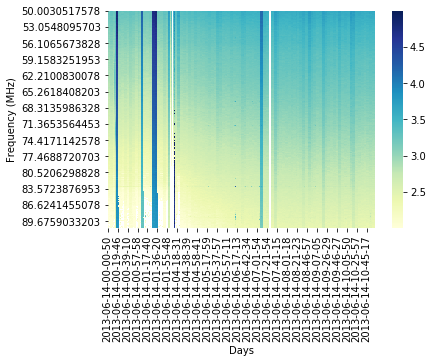

In [4]:
cols = Temps.columns.values
sb.heatmap(log_Temps[cols[0:2500]], cmap='YlGnBu', yticklabels=400)
plt.xlabel('Days')
plt.ylabel('Frequency (MHz)')
plt.savefig('Imagenes/Datajnc_%s_%s.png'%(cols[0],cols[2500]))
plt.show()


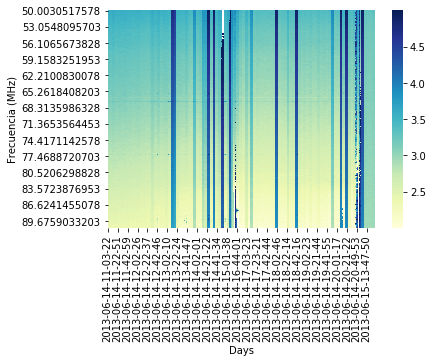

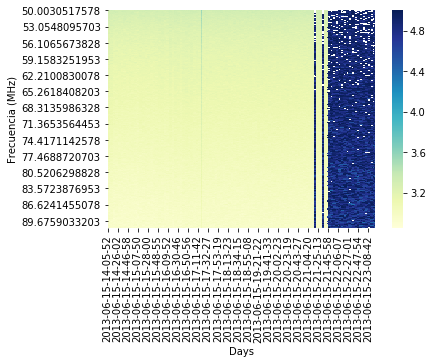

In [5]:
cols = Temps.columns.values
sb.heatmap(log_Temps[cols[2500:5000]], cmap='YlGnBu', yticklabels=400)
plt.xlabel('Days')
plt.ylabel('Frecuencia (MHz)')
plt.savefig('Imagenes/Datajnc_%s_%s.png'%(cols[2500],cols[5000]))
plt.show()

sb.heatmap(log_Temps[cols[5000:]], cmap='YlGnBu', yticklabels=400)
plt.xlabel('Days')
plt.ylabel('Frecuencia (MHz)')
plt.savefig('Imagenes/Datajnc_%s_%s.png'%(cols[5000],cols[-1]))
plt.show()

Text(33,0.5,u'Frecuencia (MHz)')

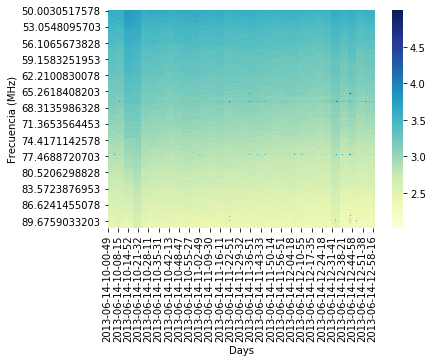

In [6]:
cols = Temps.columns.values
sb.heatmap(log_Temps.loc[:,'2013-06-14-10-00-49':'2013-06-14-13-00-30'], cmap='YlGnBu', yticklabels=400)
plt.xlabel('Days')
plt.ylabel('Frecuencia (MHz)')

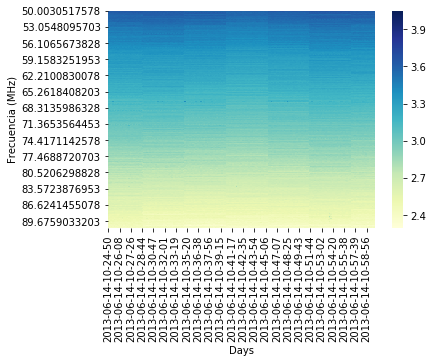

In [7]:
temp = Temps.loc[:,'2013-06-14-10-24-50':'2013-06-14-10-59-52']
data = temp.values
sb.heatmap(np.log10(temp), cmap='YlGnBu', yticklabels=400)
plt.xlabel('Days')
plt.ylabel('Frecuencia (MHz)')
plt.savefig('Imagenes/Datajnc_%s_%s.png'%('2013-06-14-10-24-50','2013-06-14-10-59-52'))
index = Temps.index.values

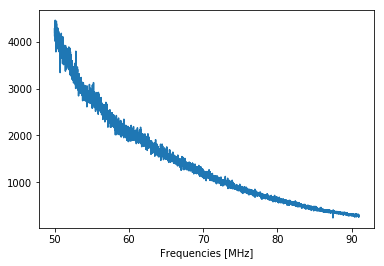

In [8]:
plt.plot(index,data[:,0])
plt.xlabel('Frequencies [MHz]')
plt.show()

In [21]:
data_gsm =  pd.read_hdf('calibration/Tgsm.hdf5')
data_reduce = data_gsm.loc[:,'2013-06-14 17:30:00.000':'2013-06-14 18:00:00.000']
T_gsm = data_reduce.values
freqs = data_reduce.index.values
np.shape(T_gsm)

(41, 7)

In [22]:
# Data binnig
freq_bins = []
for f in freqs:
    mask = (index>=f)&(index<f+1)
    freq_bins.append(np.mean(temp[mask]))
Temp_binfreq = np.array(freq_bins)

bins = int(np.shape(Temp_binfreq)[1]/25. +1) # Data binning in time, 25 is because every 25 data is 5 mins (Aprox 12 secs between data)
T_meas = np.zeros(np.shape(T_gsm))
T_std = np.zeros(np.shape(T_gsm))
for i in range(bins):
    T_meas[:,i] = np.mean(Temp_binfreq[:,i:i+25], axis =1)
    T_std[:,i] = np.std(Temp_binfreq[:,i:i+25], axis =1)

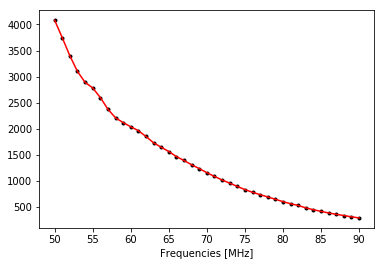

In [23]:
plt.plot(freqs,np.mean(T_meas,axis=1), '.k')
plt.plot(freqs,np.mean(T_meas,axis=1),'r')
plt.xlabel('Frequencies [MHz]')
plt.savefig('Imagenes/Uncalibrated_jnc.png')

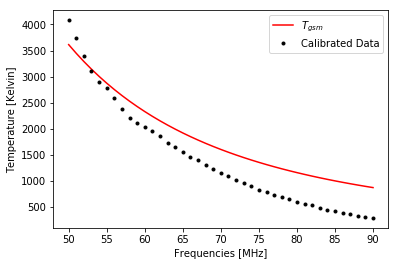

In [24]:
Tgsm_mean = np.mean(T_gsm,axis=1)
Tmeas_mean = np.mean(T_meas,axis=1)

plt.plot(freqs,Tgsm_mean, 'r',label=r'$T_{gsm}$')
plt.plot(freqs,Tmeas_mean,'.k', label = 'Calibrated Data')
plt.xlabel('Frequencies [MHz]')
plt.ylabel('Temperature [Kelvin]')
plt.legend()
plt.savefig('Imagenes/calibrated_jnc.png')

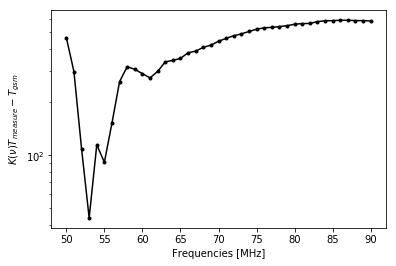

In [30]:
plt.semilogy(freqs,abs(Tmeas_mean - Tgsm_mean),'.-k')
plt.xlabel('Frequencies [MHz]')
plt.ylabel(r'$K(\nu)T_{measure}-T_{gsm}$')
plt.savefig('Imagenes/Tmeas-Tgsm_jnc.png')

In [26]:
K_jnc = Kjnc.loc[:,'2013-06-14-10-24-50':'2013-06-14-10-59-52']

In [27]:
freq_bins = []
for f in freqs:
    mask = (index>=f)&(index<f+1)
    freq_bins.append(np.mean(K_jnc[mask]))
Kjnc_binfreq = np.array(freq_bins)

bins = int(np.shape(Temp_binfreq)[1]/25. +1) # Data binning in time, 25 is because every 25 data is 5 mins (Aprox 12 secs between data)
K_meas = np.zeros(np.shape(T_gsm))
K_std = np.zeros(np.shape(T_gsm))
for i in range(bins):
    K_meas[:,i] = np.mean(Kjnc_binfreq[:,i:i+25], axis =1)
    K_std[:,i] = np.std(Kjnc_binfreq[:,i:i+25], axis =1)

(60, 90)

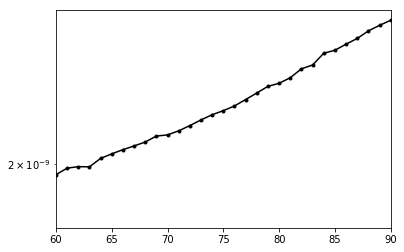

In [29]:
K_mean = np.mean(K_meas,axis=1)
plt.semilogy(freqs,K_mean,'.-k')
plt.xlim(60,90)